# Load data

In [2]:
! gdown --id 1Hw43tlzLghcfBSzpaRfyIcvI0skcPvMV

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Hw43tlzLghcfBSzpaRfyIcvI0skcPvMV
From (redirected): https://drive.google.com/uc?id=1Hw43tlzLghcfBSzpaRfyIcvI0skcPvMV&confirm=t&uuid=79d07945-f4e3-4e97-8587-69a174a1aaff
To: /kaggle/working/descriptors_mordred.csv
100%|█████████████████████████████████████████| 376M/376M [00:01<00:00, 244MB/s]


In [3]:
! gdown --id 193P4ONQxD650wf--OKClEPyLGD6gOvlS

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=193P4ONQxD650wf--OKClEPyLGD6gOvlS
To: /kaggle/working/Acute Toxicity_mouse_intraperitoneal_LD50.csv
100%|██████████████████████████████████████| 5.63M/5.63M [00:00<00:00, 52.1MB/s]


# Installing libraries

In [4]:
!pip install rdkit-pypi mols2grid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.13
    Uninstalling jupyterlab_widgets-3.0.13:
      Successfully uninstalled jupyterlab_widgets-3.0.13
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.13
    Uninstalling widgetsnbextension-4.0.13:
      Successfully uninstalled widgetsnbextension-4.0.13
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.5
    Uninstalling ipywidgets-8.1.5:
      Successfully uninstalled ipywidgets-8.1.5
ERROR: pip

# Import libraries

In [5]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmilesFromSmiles
import mols2grid
from tqdm.auto import tqdm
from rdkit.Chem.Draw import IPythonConsole'
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from  sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math
IPythonConsole.ipython_useSVG=True

## Progress bars for pandas

In [6]:
tqdm.pandas()

## Reading dataset with Acute Mouse Intraperitoneal Toxicity data

In [7]:
target_df = pd.read_csv("/kaggle/working/Acute Toxicity_mouse_intraperitoneal_LD50.csv")
target_df.head()

,TAID,Name,IUPAC Name,PubChem CID,Canonical SMILES,InChIKey,Toxicity Value
0,TOX-145,hydroquinone,"benzene-1,4-diol",785,Oc1ccc(O)cc1,QIGBRXMKCJKVMJ-UHFFFAOYSA-N,99.998184
1,TOX-245,thiotepa,tris(aziridin-1-yl)-sulfanylidene-lambda5-phos...,5453,S=P(N1CC1)(N1CC1)N1CC1,FOCVUCIESVLUNU-UHFFFAOYSA-N,10.999767
2,TOX-1273,lindane,"1,2,3,4,5,6-hexachlorocyclohexane",727,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,JLYXXMFPNIAWKQ-UHFFFAOYSA-N,124.986246
3,TOX-1279,metformin,"3-(diaminomethylidene)-1,1-dimethylguanidine",4091,CN(C)C(=N)N=C(N)N,XZWYZXLIPXDOLR-UHFFFAOYSA-N,294.797771
4,TOX-1282,CARVACROL,2-methyl-5-propan-2-ylphenol,10364,Cc1ccc(C(C)C)cc1O,RECUKUPTGUEGMW-UHFFFAOYSA-N,73.299512


## Reading dataset with Mordred descriptor data

In [8]:
descriptors_df = pd.read_csv('/kaggle/working/descriptors_mordred.csv')
descriptors_df.head()

,Unnamed: 0,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,0,0,0,9.924777,2.170086,4.340173,9.924777,1.240597,2.979730,2.742040,...,0.000000,8.463159,35.730685,110.036779,7.859770,62,7,36.0,38.0,1.833333
1,1,0,0,15.203358,2.601679,4.863481,15.203358,1.382123,3.544956,3.159945,...,8.503703,9.891769,66.234321,189.048955,8.219520,139,18,68.0,88.0,2.250000
2,2,0,0,14.601126,2.414214,4.828427,14.601126,1.216761,3.391683,3.200413,...,0.000000,9.542876,43.309911,287.860066,15.992226,174,21,60.0,72.0,2.666667
3,3,0,5,9.335326,2.116883,4.233766,9.335326,1.037258,3.028326,2.774515,...,0.000000,8.267962,36.359125,129.101445,6.455072,96,8,36.0,36.0,2.111111
4,4,0,0,13.152542,2.292456,4.584911,13.152542,1.195686,3.294652,3.103869,...,0.000000,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,2.472222


## Function for toxicity classification occording to the U.S. Environmental Protection Agency (EPA)

In [8]:
def category(x):
  if x <= 50:
    return 1
  elif x <= 500:
    return 2
  elif x <= 5000:
    return 3
  else:
    return 4

In [9]:
target_df['category'] = target_df['Toxicity Value'].apply(lambda x: category(x))
category_df = target_df.category.value_counts().reset_index().copy()
category_df

,category,count
0,2,18124
1,3,13089
2,1,3785
3,4,301


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


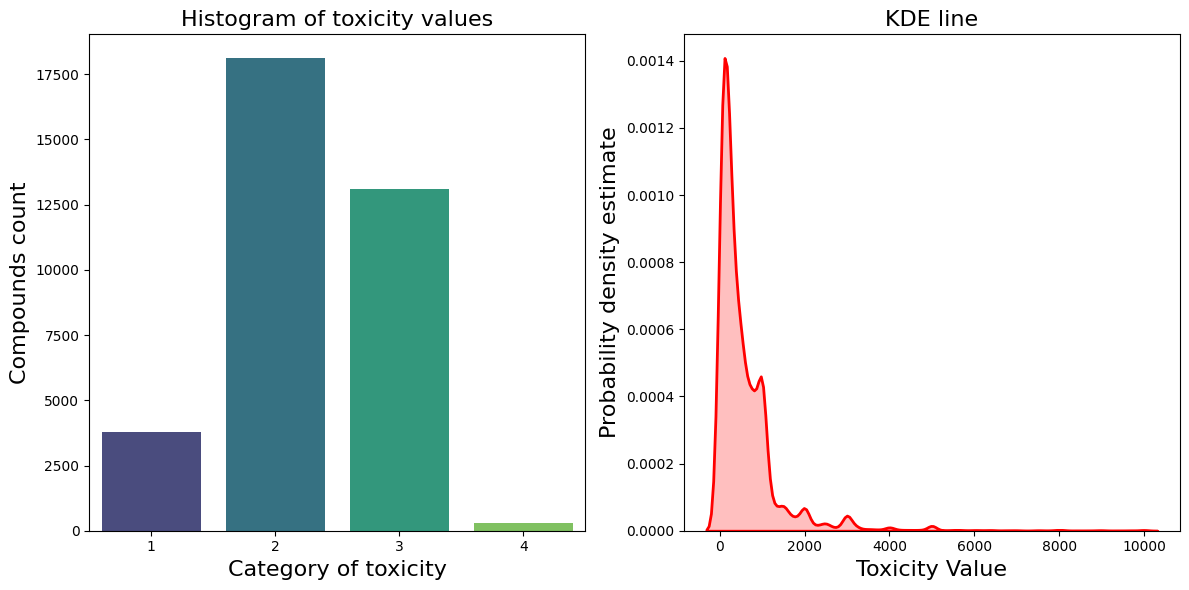

In [13]:
# Visualization histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='category', y='count', data=category_df, palette='viridis')
plt.title('Histogram of toxicity values', fontsize=16)
plt.xlabel('Category of toxicity', fontsize=16)
plt.ylabel('Compounds count', fontsize=16)

# Visualization of Q-Q chart
plt.subplot(1, 2, 2)
plt.title('KDE line', fontsize=16)
sns.kdeplot(target_df['Toxicity Value'].loc[target_df['Toxicity Value'] <=10000], color='red', linewidth=2, label='KDE', fill=True)
plt.xlabel('Toxicity Value', fontsize=16)
plt.ylabel('Probability density estimate', fontsize=16)

plt.tight_layout()
plt.show()


# Target engineering

In [9]:
data = target_df.join(descriptors_df)
y = data['Toxicity Value'].apply(lambda x: math.log(x, 10))/data['MW']
y1 = data['Toxicity Value'].apply(lambda x: math.log(x, 10))
y2 = data['Toxicity Value']
X = data.iloc[:, 8:]

In [10]:
X.head()

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,0,0,9.924777,2.170086,4.340173,9.924777,1.240597,2.979730,2.742040,0.342755,...,0.000000,8.463159,35.730685,110.036779,7.859770,62,7,36.0,38.0,1.833333
1,0,0,15.203358,2.601679,4.863481,15.203358,1.382123,3.544956,3.159945,0.287268,...,8.503703,9.891769,66.234321,189.048955,8.219520,139,18,68.0,88.0,2.250000
2,0,0,14.601126,2.414214,4.828427,14.601126,1.216761,3.391683,3.200413,0.266701,...,0.000000,9.542876,43.309911,287.860066,15.992226,174,21,60.0,72.0,2.666667
3,0,5,9.335326,2.116883,4.233766,9.335326,1.037258,3.028326,2.774515,0.308279,...,0.000000,8.267962,36.359125,129.101445,6.455072,96,8,36.0,36.0,2.111111
4,0,0,13.152542,2.292456,4.584911,13.152542,1.195686,3.294652,3.103869,0.282170,...,0.000000,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,2.472222


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


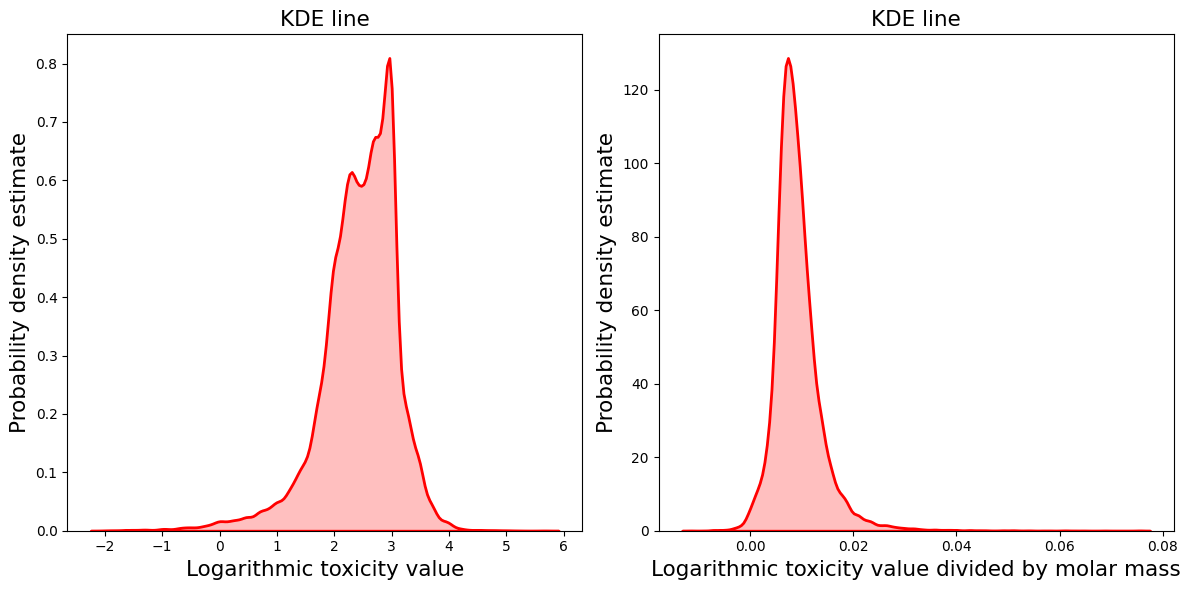

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Visualization of Q-Q chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('KDE line', fontsize=15.5)
sns.kdeplot(y1[(y1>=-2)&(y1<=12)], color='red', linewidth=2, label='KDE', fill=True)
plt.xlabel('Logarithmic toxicity value', fontsize=15.5)
plt.ylabel('Probability density estimate', fontsize=15.5)

# Visualization of Q-Q chart
plt.subplot(1, 2, 2)

plt.title('KDE line', fontsize=15.5)
sns.kdeplot(y[(y>=-1)&(y<=0.1)], color='red', linewidth=2, label='KDE', fill=True)
plt.xlabel('Logarithmic toxicity value divided by molar mass', fontsize=15.5)
plt.ylabel('Probability density estimate', fontsize=15.5)

plt.tight_layout()
plt.show()


# Linear regression results for different targets

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y1,
                                                    test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.307, test: 0.490
R^2 train: 0.321, test: -0.099


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y2,
                                                    test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 11093364.942, test: 2963227.257
R^2 train: 0.040, test: -0.084


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.000
R^2 train: 0.746, test: 0.713


# Feature importance

In [13]:
coefficients = model.coef_
importance = np.abs(coefficients)

# Create a DataFrame to display features and their importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Most Important Features:")
feature_list30 = feature_importance['Feature'].head(30).tolist()
feature_list15 = feature_importance['Feature'].head(15).tolist()


Most Important Features:


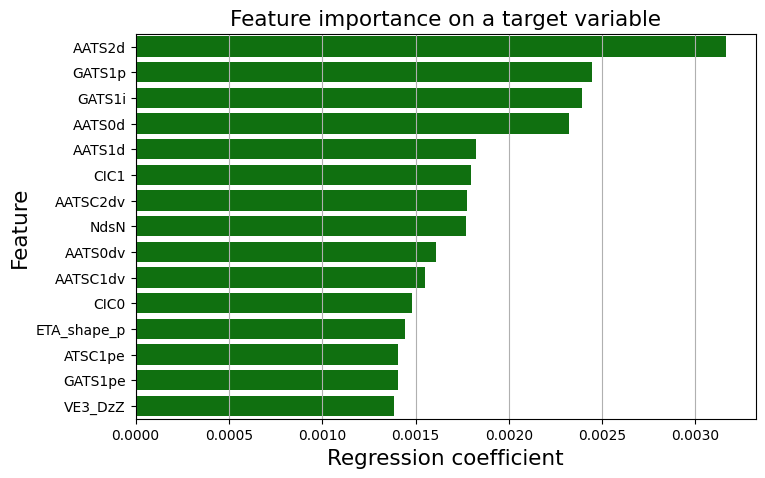

In [22]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(15)


plt.figure(figsize=(8, 5))
colors = feature_importance['Importance'].apply(lambda x: 'green' if x > 0 else 'red')

sns.barplot(x='Importance', y='Feature', data=feature_importance, palette=colors)
plt.title('Feature importance on a target variable', fontsize=15.5)
plt.xlabel('Regression coefficient', fontsize=15.5)
plt.ylabel('Feature', fontsize=15.5)
plt.grid(axis='x')
plt.show()

In [30]:
feature_importance

,Feature,Importance
110,AATS2d,0.003164
245,GATS1p,0.002444
247,GATS1i,0.002393
108,AATS0d,0.002324
109,AATS1d,0.001823
635,CIC1,0.001795
203,AATSC2dv,0.001774
446,NdsN,0.001768
105,AATS0dv,0.001611
202,AATSC1dv,0.001552


In [14]:
X_30 = X[feature_list30]
X_15 = X[feature_list15]

# Transformation of features by PolynomialFeatures

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.001
R^2 train: 0.865, test: -19.017


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.001
R^2 train: 0.865, test: -19.017


In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_15)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 34.875
R^2 train: 0.845, test: -1283660.530


In [19]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=10.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.000
R^2 train: 0.736, test: 0.730


In [26]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=10.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.4f}, test: {:.4f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.000
R^2 train: 0.811, test: 0.661


In [21]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_15)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=10.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.000
R^2 train: 0.783, test: -1.785


In [22]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Lasso(alpha=10.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.000
R^2 train: 0.030, test: 0.025


In [23]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Lasso(alpha=10.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.646e-01, tolerance: 6.438e-05
  model = cd_fast.enet_coordinate_descent(


MSE train: 0.000, test: 0.000
R^2 train: 0.162, test: 0.138


In [25]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_15)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Lasso(alpha=10.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

MSE train: 0.000, test: 0.000
R^2 train: 0.000, test: -0.000


# Best results

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=100.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR = model.predict(X_val)
print('MSE train: {:.8f}, test: {:.8f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE train: 0.00000494, test: 0.00000666
R^2 train: 0.783, test: 0.755


# Y-Randomisation test

In [18]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=100.0)
model.fit(X_train, Y_train) 
Y_pred_original = model.predict(X_test)
r2_original = r2_score(Y_test, Y_pred_original)
print(f"Original model: R² = {r2_original:.4f}")


n_permutations = 10
r2_randomized = []

for i in range(n_permutations):
    # Shuffle the Y_train POSITIONS using permutation 
    permuted_indices = np.random.permutation(len(Y_train)) 
    
    Y_train_shuffled = Y_train.iloc[permuted_indices].values 
    
    # Train the model on shuffled Y (X_train remains unchanged)
    model.fit(X_train, Y_train_shuffled)  
    Y_pred_shuffled = model.predict(X_test)
    r2_shuffled = r2_score(Y_test, Y_pred_shuffled) # Evaluate using the original Y_test
    r2_randomized.append(r2_shuffled)
    print(f"Iteration {i+1}: R² на randomized Y = {r2_shuffled:.4f}")

# Analysis of results
mean_r2_random = np.mean(r2_randomized)
std_r2_random = np.std(r2_randomized)
print(f"\nAverage R² after Y-randomization (over {n_permutations} iterations): {mean_r2_random:.4f} ± {std_r2_random:.4f}")

# Interpretation
if mean_r2_random < 0.1:  
    print("The model is robust: good results on the original data, poor on randomized.")
else:
    print("Possible overfitting: model 'predicts' even random Y.")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Оригинальная модель: R² = 0.7548


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 1: R² на randomized Y = -0.2493


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 2: R² на randomized Y = -0.3079


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 3: R² на randomized Y = -0.1654


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 4: R² на randomized Y = -0.1156


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 5: R² на randomized Y = -0.6165


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 6: R² на randomized Y = -0.0764


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 7: R² на randomized Y = -0.1246


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 8: R² на randomized Y = -0.1020


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Итерация 9: R² на randomized Y = -0.1731
Итерация 10: R² на randomized Y = -0.0391

Средний R² после Y-рандомизации (по 10 итерациям): -0.1970 ± 0.1591
Модель устойчива (robust): хорошие результаты на оригинальных данных, плохие на randomized.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


P-value from permutation test: p_value < 0.05


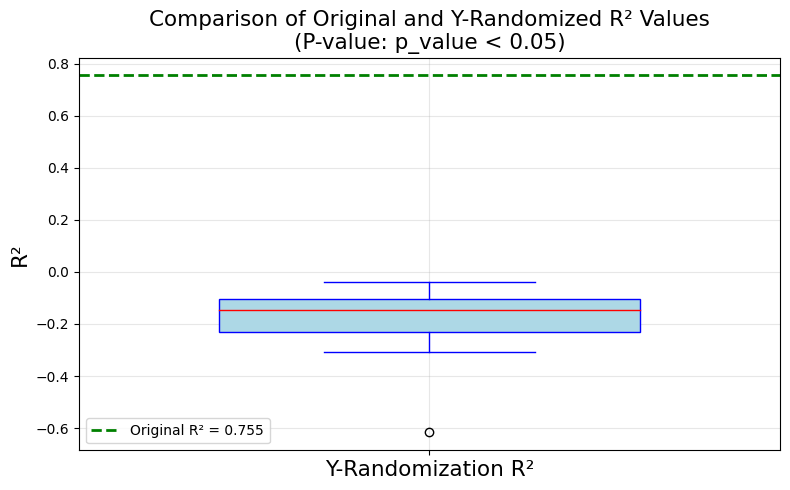

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Original R²
original_r2 = 0.755

# Average R² after Y-randomization and std dev (10 iterations)
mean_randomized = -0.1970
std_randomized = 0.1591
n_iterations = 10

randomized_r2 = np.array([-0.2493, -0.3079, -0.1654, -0.1156, -0.6165,-0.0764, -0.1246,-0.1020,-0.1731,	-0.0391
] )

# Calculate p-value using permutation test
# p-value = (number of randomized R² >= original R²) / n_iterations
count_better_or_equal = np.sum(randomized_r2 >= original_r2)
p_value = count_better_or_equal / n_iterations
print(f"P-value from permutation test: p_value < 0.05")

# Visualization
fig, ax = plt.subplots(figsize=(8, 5))

ax.boxplot(randomized_r2, positions=[1], widths=0.6, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'), 
           medianprops=dict(color='red'), whiskerprops=dict(color='blue'), 
           capprops=dict(color='blue'))


ax.axhline(y=original_r2, color='green', linestyle='--', linewidth=2, label=f'Original R² = {original_r2}')

ax.set_xticks([1])
ax.set_xticklabels(['Y-Randomization R²'], fontsize=15.5)
ax.set_ylabel('R²', fontsize=15.5)
ax.set_title(f'Comparison of Original and Y-Randomized R² Values\n(P-value: p_value < 0.05)', fontsize=15.5)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [28]:
fig.savefig('my_plot.png')

# Getting the equation of Ridge regression

In [18]:
feature_names = poly.get_feature_names_out() 

# Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Getting the equation as a string
equation = f"y = {intercept:.4f}"
for i, (coef, name) in enumerate(zip(coefficients, feature_names)):
    if abs(coef) > 1e-6:  # Ignore very small coefficients (around 0)
        sign = " + " if coef >= 0 else " - "
        equation += f"{sign}{abs(coef):.4f} * {name}"
print(equation)

y = -0.0008 + 0.0001 * AATS2d + 0.0002 * GATS1p + 0.0001 * GATS1i + 0.0001 * AATS0d + 0.0001 * AATS1d + 0.0000 * SssssGe - 0.0001 * CIC1 - 0.0000 * AATSC2dv + 0.0001 * AATS0dv + 0.0001 * CIC0 + 0.0000 * VE3_DzZ + 0.0001 * AATSC1dv + 0.0001 * VE3_Dzm + 0.0000 * VE3_Dzpe + 0.0000 * VE3_Dzi + 0.0000 * VE3_D + 0.0000 * VE3_Dzv - 0.0000 * GATS1pe + 0.0000 * VE3_Dzp + 0.0000 * ATSC1pe + 0.0004 * AATS2dv - 0.0000 * ETA_shape_p + 0.0000 * VE3_A + 0.0001 * SssS + 0.0001 * fMF + 0.0001 * SpAD_Dzv - 0.0000 * n3HRing - 0.0000 * n3AHRing + 0.0000 * JGT10 + 0.0002 * AATS2d^2 + 0.0003 * AATS2d GATS1p + 0.0000 * AATS2d GATS1i + 0.0002 * AATS2d AATS0d + 0.0002 * AATS2d AATS1d + 0.0000 * AATS2d SssssGe - 0.0000 * AATS2d CIC1 - 0.0001 * AATS2d AATSC2dv + 0.0003 * AATS2d AATS0dv + 0.0000 * AATS2d NdsN + 0.0003 * AATS2d CIC0 + 0.0000 * AATS2d VE3_DzZ + 0.0001 * AATS2d AATSC1dv + 0.0000 * AATS2d VE3_Dzm - 0.0000 * AATS2d VE3_Dzpe - 0.0000 * AATS2d VE3_Dzi - 0.0000 * AATS2d VE3_D - 0.0000 * AATS2d VE3_Dzv - 

# Parameter selection

In [37]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=50.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR1 = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR1)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR1)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.81661e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE train: 0.000, test: 0.000
R^2 train: 0.789, test: 0.749


In [38]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=100.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR2 = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR2)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR2)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.2271e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE train: 0.000, test: 0.000
R^2 train: 0.783, test: 0.755


In [39]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=150.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR3 = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR3)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR3)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09719e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE train: 0.000, test: 0.000
R^2 train: 0.780, test: 0.750


In [40]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_30)
X_train, X_val, y_train, y_val = train_test_split(X_poly, y,
                                                    test_size=0.2, random_state=42)


model = Ridge(alpha=200.0).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred_LR4 = model.predict(X_val)
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred_LR4)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred_LR4)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.33448e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE train: 0.000, test: 0.000
R^2 train: 0.777, test: 0.745


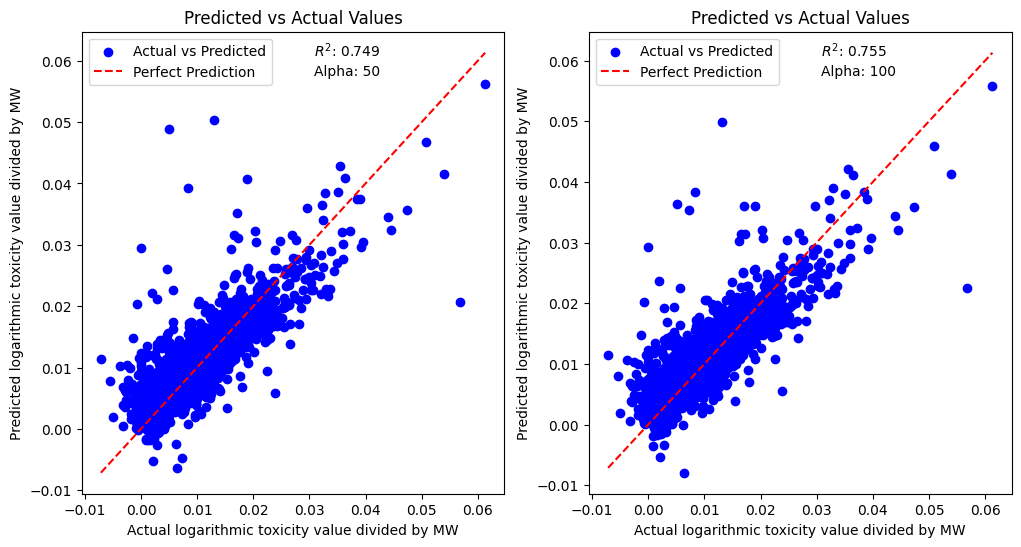

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming y_val is your actual values and y_val_pred_LR is your predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
r2 = r2_score(y_val, y_val_pred_LR1)
alpha = 50  # Replace with your actual alpha value used in Ridge regression

# Visualize predicted vs actual values with different colors
plt.scatter(y_val[y_val<0.18], y_val_pred_LR1[y_val_pred_LR1<0.14], c='blue', label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val[y_val<0.18])], [min(y_val), max(y_val[y_val<0.18])], '--', c='red', label='Perfect Prediction')
plt.xlabel("Actual logarithmic toxicity value divided by MW")
plt.ylabel("Predicted logarithmic toxicity value divided by MW")
plt.title("Predicted vs Actual Values")

# Adding R^2 and alpha to the plot
plt.text(0.55, 0.98, f'$R^2$: {r2:.3f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.55, 0.93, f'Alpha: {alpha}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.legend()


plt.subplot(1, 2, 2)
r2 = r2_score(y_val, y_val_pred_LR2)
alpha = 100  # Replace with your actual alpha value used in Ridge regression

# Visualize predicted vs actual values with different colors
plt.scatter(y_val[y_val<0.18], y_val_pred_LR2[y_val_pred_LR2<0.14], c='blue', label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val[y_val<0.18])], [min(y_val), max(y_val[y_val<0.18])], '--', c='red', label='Perfect Prediction')
plt.xlabel("Actual logarithmic toxicity value divided by MW")
plt.ylabel("Predicted logarithmic toxicity value divided by MW")
plt.title("Predicted vs Actual Values")

# Adding R^2 and alpha to the plot
plt.text(0.55, 0.98, f'$R^2$: {r2:.3f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.55, 0.93, f'Alpha: {alpha}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.legend()



plt.show()

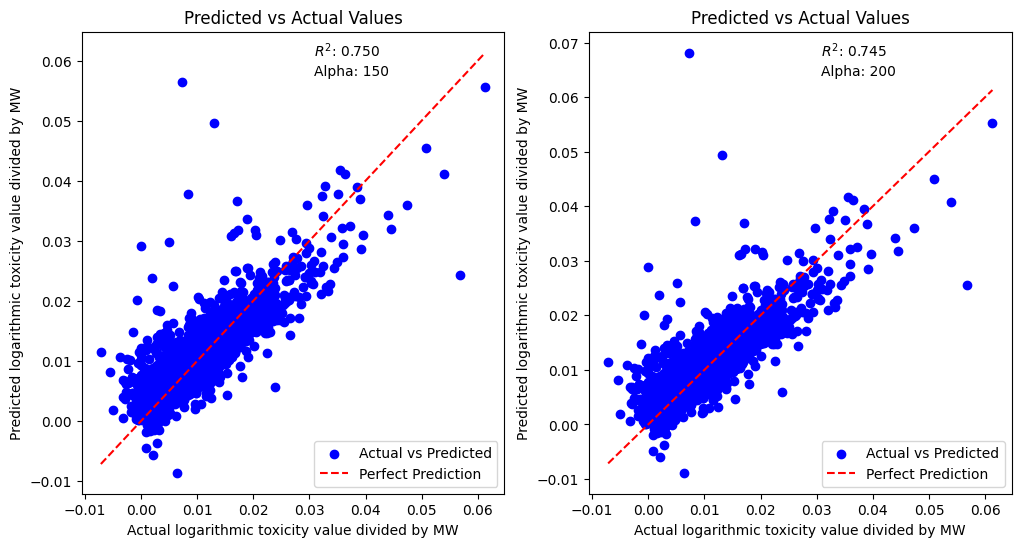

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming y_val is your actual values and y_val_pred_LR is your predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
r2 = r2_score(y_val, y_val_pred_LR3)
alpha = 150  # Replace with your actual alpha value used in Ridge regression

# Visualize predicted vs actual values with different colors
plt.scatter(y_val[y_val<0.18], y_val_pred_LR3[y_val_pred_LR3<0.14], c='blue', label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val[y_val<0.18])], [min(y_val), max(y_val[y_val<0.18])], '--', c='red', label='Perfect Prediction')
plt.xlabel("Actual logarithmic toxicity value divided by MW")
plt.ylabel("Predicted logarithmic toxicity value divided by MW")
plt.title("Predicted vs Actual Values")

# Adding R^2 and alpha to the plot
plt.text(0.55, 0.98, f'$R^2$: {r2:.3f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.55, 0.93, f'Alpha: {alpha}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
r2 = r2_score(y_val, y_val_pred_LR4)
alpha = 200  # Replace with your actual alpha value used in Ridge regression

# Visualize predicted vs actual values with different colors
plt.scatter(y_val[y_val<0.18], y_val_pred_LR4[y_val_pred_LR4<0.14], c='blue', label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val[y_val<0.18])], [min(y_val), max(y_val[y_val<0.18])], '--', c='red', label='Perfect Prediction')
plt.xlabel("Actual logarithmic toxicity value divided by MW")
plt.ylabel("Predicted logarithmic toxicity value divided by MW")
plt.title("Predicted vs Actual Values")

# Adding R^2 and alpha to the plot
plt.text(0.55, 0.98, f'$R^2$: {r2:.3f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.55, 0.93, f'Alpha: {alpha}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.legend(loc='lower right')



plt.show()